# Exploratory Data Analysis (EDA) on Retail Sales Data

## Description:

In this project, you will work with a dataset containing information about retail sales. The goal is to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can help the retail business make informed decisions.

## Key Concepts and Challenges:

Data Loading and Cleaning: Load the retail sales dataset.

Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).

Time Series Analysis: Analyze sales trends over time using time series techniques.

Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

Visualization: Present insights through bar charts, line plots, and heatmaps.

Recommendations: Provide actionable recommendations based on the EDA.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
retail_sales = pd.read_csv("C://Users//srivi//Downloads//archive (4)//retail_sales_dataset.csv")
retail_sales.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [4]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
print("\nSummary Statistics:\n", retail_sales.describe(include='all'))


Summary Statistics:
         Transaction ID        Date Customer ID  Gender         Age  \
count      1000.000000        1000        1000    1000  1000.00000   
unique             NaN         345        1000       2         NaN   
top                NaN  2023-05-16     CUST102  Female         NaN   
freq               NaN          11           1     510         NaN   
mean        500.500000         NaN         NaN     NaN    41.39200   
std         288.819436         NaN         NaN     NaN    13.68143   
min           1.000000         NaN         NaN     NaN    18.00000   
25%         250.750000         NaN         NaN     NaN    29.00000   
50%         500.500000         NaN         NaN     NaN    42.00000   
75%         750.250000         NaN         NaN     NaN    53.00000   
max        1000.000000         NaN         NaN     NaN    64.00000   

       Product Category     Quantity  Price per Unit  Total Amount  
count              1000  1000.000000     1000.000000   1000.000000  

In [6]:
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'], errors='coerce')

In [7]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [8]:
print("\n Product Categories:", retail_sales['Product Category'].unique())
print(" Genders:", retail_sales['Gender'].unique())


 Product Categories: ['Beauty' 'Clothing' 'Electronics']
 Genders: ['Male' 'Female']


In [9]:
print("\nMissing Values:\n", retail_sales.isnull().sum())


Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [10]:
retail_sales.dropna(subset=['Date', 'Total Amount'], inplace=True)

In [11]:
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Descriptive Statistics

In [12]:
print("\nDescriptive Statistics:\n", retail_sales.describe())


Descriptive Statistics:
        Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


### Time Series Analysis

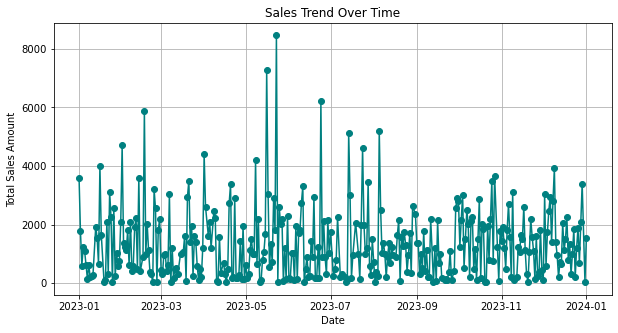

In [13]:
sales_over_time = retail_sales.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_over_time, marker='o', color='teal')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()

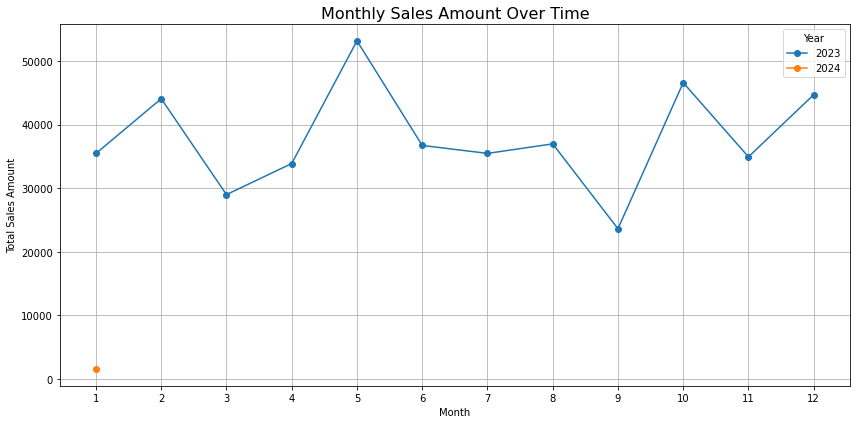

🏆 Best Performing Month:
Year             2023
Month               5
Total Amount    53150
Name: 4, dtype: int64


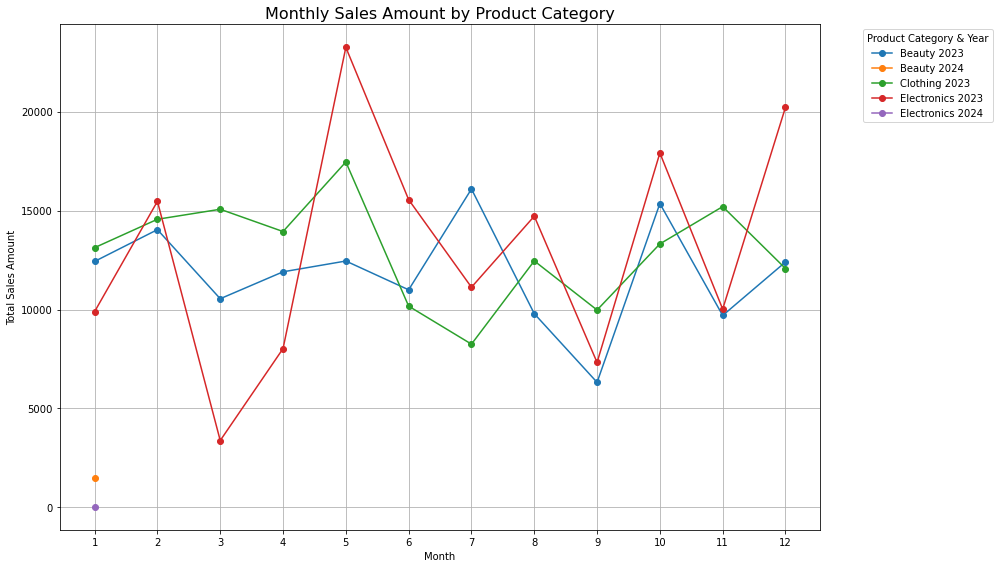

In [14]:
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'], errors='coerce')
retail_sales['Month'] = retail_sales['Date'].dt.month
retail_sales['Year'] = retail_sales['Date'].dt.year

monthly_sales = (
    retail_sales.groupby(['Year', 'Month'])['Total Amount']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(data['Month'], data['Total Amount'], marker='o', label=str(year))

plt.title('Monthly Sales Amount Over Time', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

best_month = monthly_sales.loc[monthly_sales['Total Amount'].idxmax()]
print("🏆 Best Performing Month:")
print(f"{best_month}")


category_monthly_sales = (
    retail_sales.groupby(['Product Category', 'Year', 'Month'])['Total Amount']
    .sum()
    .reset_index()
)

plt.figure(figsize=(14,8))
categories = category_monthly_sales['Product Category'].unique()

for category in categories:
    data = category_monthly_sales[category_monthly_sales['Product Category'] == category]
    for year in data['Year'].unique():
        yearly_data = data[data['Year'] == year]
        plt.plot(yearly_data['Month'], yearly_data['Total Amount'], marker='o', label=f'{category} {year}')

plt.title('Monthly Sales Amount by Product Category', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category & Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

### Customer and Product Analysis

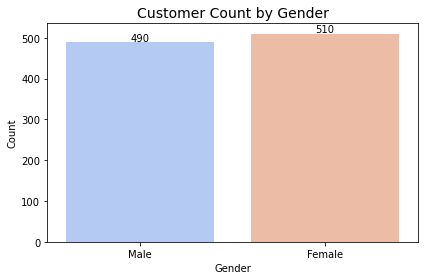

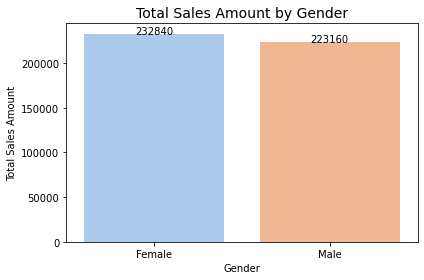

In [15]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=retail_sales, palette='coolwarm')
ax.set_title("Customer Count by Gender", fontsize=14)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()


sales_gen = (
    retail_sales.groupby(['Gender'], as_index=False)['Total Amount']
    .sum()
    .sort_values(by='Total Amount', ascending=False)
)

plt.figure(figsize=(6,4))
ax = sns.barplot(x='Gender', y='Total Amount', data=sales_gen, palette='pastel')
ax.set_title("Total Sales Amount by Gender", fontsize=14)
ax.set_xlabel("Gender")
ax.set_ylabel("Total Sales Amount")


for index, row in sales_gen.iterrows():
    ax.text(index, row['Total Amount'] + 100, f"{row['Total Amount']:.0f}", 
            color='black', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

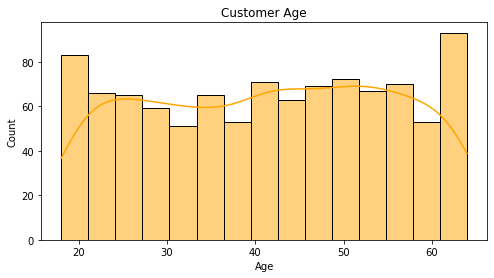

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(retail_sales['Age'], bins=15, kde=True, color='orange')
plt.title("Customer Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

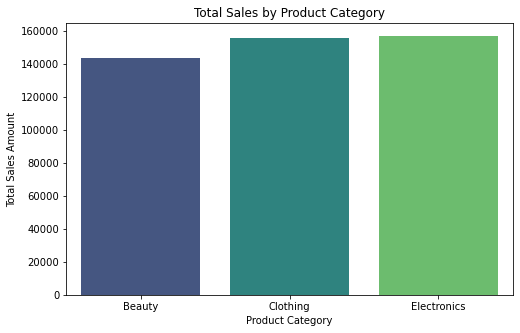

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Product Category', y='Total Amount', data=retail_sales, estimator=sum, ci=None, palette='viridis')
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales Amount")
plt.grid(False)
plt.show()

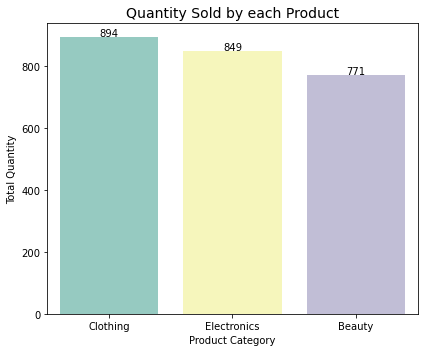

In [18]:
plt.figure(figsize=(6,5))
category_quantity = (
    retail_sales.groupby('Product Category')['Quantity']
    .sum()
    .reset_index()
    .sort_values(by='Quantity', ascending=False)
)

ax = sns.barplot(x='Product Category', y='Quantity', data=category_quantity, palette='Set3')
ax.set_title('Quantity Sold by each Product', fontsize=14)
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Quantity')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, f'{int(height)}',
            ha="center", fontsize=10)

plt.tight_layout()
plt.show()


### Visualization

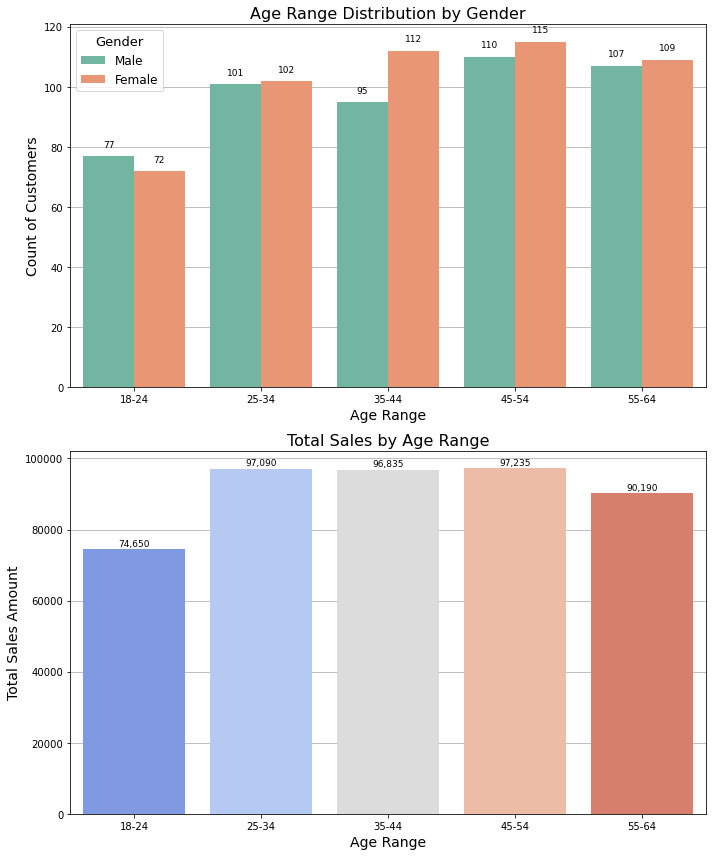

Total Sales by Age Range:

  Age Range  Total Amount
3     45-54         97235
1     25-34         97090
2     35-44         96835
4     55-64         90190
0     18-24         74650


In [19]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

retail_sales['Age Range'] = pd.cut(retail_sales['Age'], bins=bins, labels=labels, right=False)

sales_age_range = (
    retail_sales.groupby('Age Range', as_index=False)['Total Amount']
    .sum()
    .sort_values(by='Total Amount', ascending=False)
)


fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.countplot(data=retail_sales, x='Age Range', hue='Gender', palette='Set2', ax=axes[0])
axes[0].set_title('Age Range Distribution by Gender', fontsize=16)
axes[0].set_xlabel('Age Range', fontsize=14)
axes[0].set_ylabel('Count of Customers', fontsize=14)
axes[0].legend(title='Gender', fontsize=12, title_fontsize='13')

for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width()/2., height + 3,
                 f'{int(height)}', ha="center", fontsize=9)

axes[0].yaxis.grid(True)
axes[0].set_axisbelow(True)

sns.barplot(data=sales_age_range, x='Age Range', y='Total Amount', palette='coolwarm', ax=axes[1])
axes[1].set_title('Total Sales by Age Range', fontsize=16)
axes[1].set_xlabel('Age Range', fontsize=14)
axes[1].set_ylabel('Total Sales Amount', fontsize=14)

for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width()/2., height + (0.01 * height),
                 f'{height:,.0f}', ha="center", fontsize=9)

axes[1].yaxis.grid(True)
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()


print("Total Sales by Age Range:\n")
print(sales_age_range)

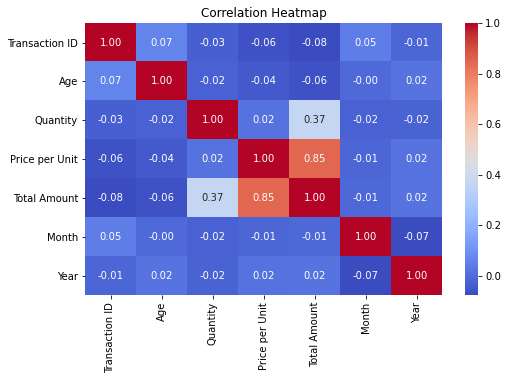

In [20]:
plt.figure(figsize=(8,5))
sns.heatmap(retail_sales.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

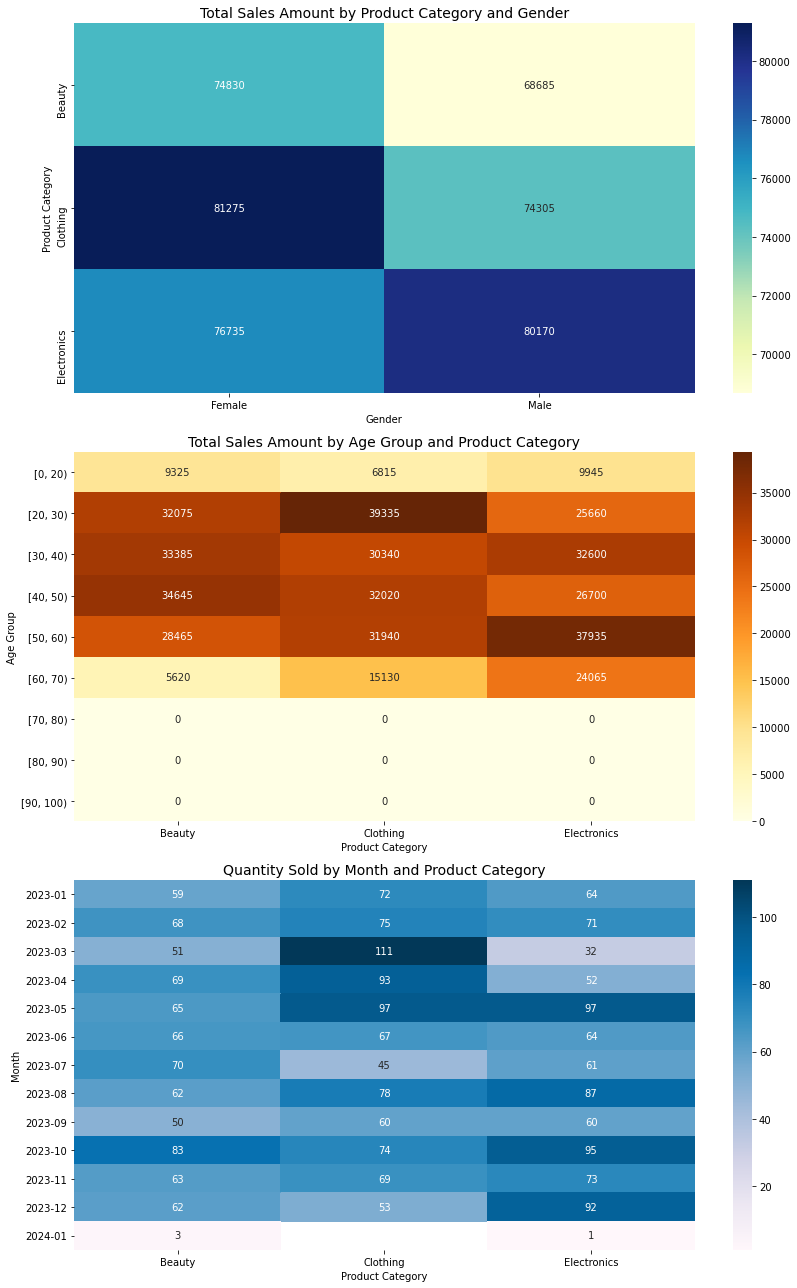

In [21]:
retail_sales['Date'] = pd.to_datetime(retail_sales['Date'], errors='coerce')
retail_sales['Month'] = retail_sales['Date'].dt.to_period('M')

retail_sales['Age Group'] = pd.cut(
    retail_sales['Age'],
    bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    right=False
)

sales_category_gender = retail_sales.pivot_table(
    values='Total Amount',
    index='Product Category',
    columns='Gender',
    aggfunc='sum'
)

sales_age_category = retail_sales.pivot_table(
    values='Total Amount',
    index='Age Group',
    columns='Product Category',
    aggfunc='sum',
    observed=False
)

quantity_month_category = retail_sales.pivot_table(
    values='Quantity',
    index='Month',
    columns='Product Category',
    aggfunc='sum'
)

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

sns.heatmap(sales_category_gender, annot=True, fmt='.0f', cmap='YlGnBu', ax=axs[0])
axs[0].set_title('Total Sales Amount by Product Category and Gender', fontsize=14)

sns.heatmap(sales_age_category, annot=True, fmt='.0f', cmap='YlOrBr', ax=axs[1])
axs[1].set_title('Total Sales Amount by Age Group and Product Category', fontsize=14)

sns.heatmap(quantity_month_category, annot=True, fmt='.0f', cmap='PuBu', ax=axs[2])
axs[2].set_title('Quantity Sold by Month and Product Category', fontsize=14)

plt.tight_layout()
plt.show()

### Conclusion

In [22]:
top_category = retail_sales.groupby('Product Category')['Total Amount'].sum().idxmax()
top_gender = retail_sales.groupby('Gender')['Total Amount'].sum().idxmax()
avg_age = round(retail_sales['Age'].mean())

best_month_info = best_month.to_dict()
best_month_label = f"{int(best_month_info['Month'])}-{int(best_month_info['Year'])}"

print("\n--- KEY INSIGHTS ---")
print(f"Top Product Category: {top_category}")
print(f"Gender with Highest Sales: {top_gender}")
print(f"Average Customer Age: {avg_age} years")
print(f"Best Performing Month: {best_month_label}")
print(f"Peak Monthly Sales Amount: {best_month_info['Total Amount']:.2f}\n")



--- KEY INSIGHTS ---
Top Product Category: Electronics
Gender with Highest Sales: Female
Average Customer Age: 41 years
Best Performing Month: 5-2023
Peak Monthly Sales Amount: 53150.00



### Recommendation

In [23]:
print(" --- RECOMMENDATIONS ---\n")
print("1) Focus marketing campaigns on the top-performing category "
      f"({top_category}) with seasonal offers and bundles.")
print("2) Increase promotions for female customers — the primary revenue drivers.")
print("3) Target middle-aged customers (30–50 years) for premium product promotions.")
print("4) Maintain strong stock levels and advertising during peak month "
      f"({best_month_label}).")
print("5) Implement loyalty programs for frequent buyers aged 35–55.")
print("6) Use insights from heatmaps to tailor product availability by gender and age group.")


 --- RECOMMENDATIONS ---

1) Focus marketing campaigns on the top-performing category (Electronics) with seasonal offers and bundles.
2) Increase promotions for female customers — the primary revenue drivers.
3) Target middle-aged customers (30–50 years) for premium product promotions.
4) Maintain strong stock levels and advertising during peak month (5-2023).
5) Implement loyalty programs for frequent buyers aged 35–55.
6) Use insights from heatmaps to tailor product availability by gender and age group.
